<a href="https://colab.research.google.com/github/pireylow/LSTM-keras-stock-price-prediction/blob/main/3D_Models_for_MA_and_Profits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install yfinance


In [18]:
#import necessary modules
import random
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



In [19]:
#set stock information
ticker = ['SPY']
startdate = '2018-01-01'
enddate = '2023-12-01'


start = pd.to_datetime(startdate)
end = pd.to_datetime(enddate)
sdata = pdr.get_data_yahoo(ticker, start=start, end=end)

columnsTitles=['Open','High','Low','Close','Volume','Adj Close']
sdata=sdata.reindex(columns=columnsTitles)


[*********************100%***********************]  1 of 1 completed


In [20]:
close=sdata['Close']
close = close.dropna()
close.describe()

count    1392.000000
mean      350.770043
std        66.544371
min       222.949997
25%       287.004990
50%       342.650009
75%       411.812508
max       477.709991
Name: Close, dtype: float64

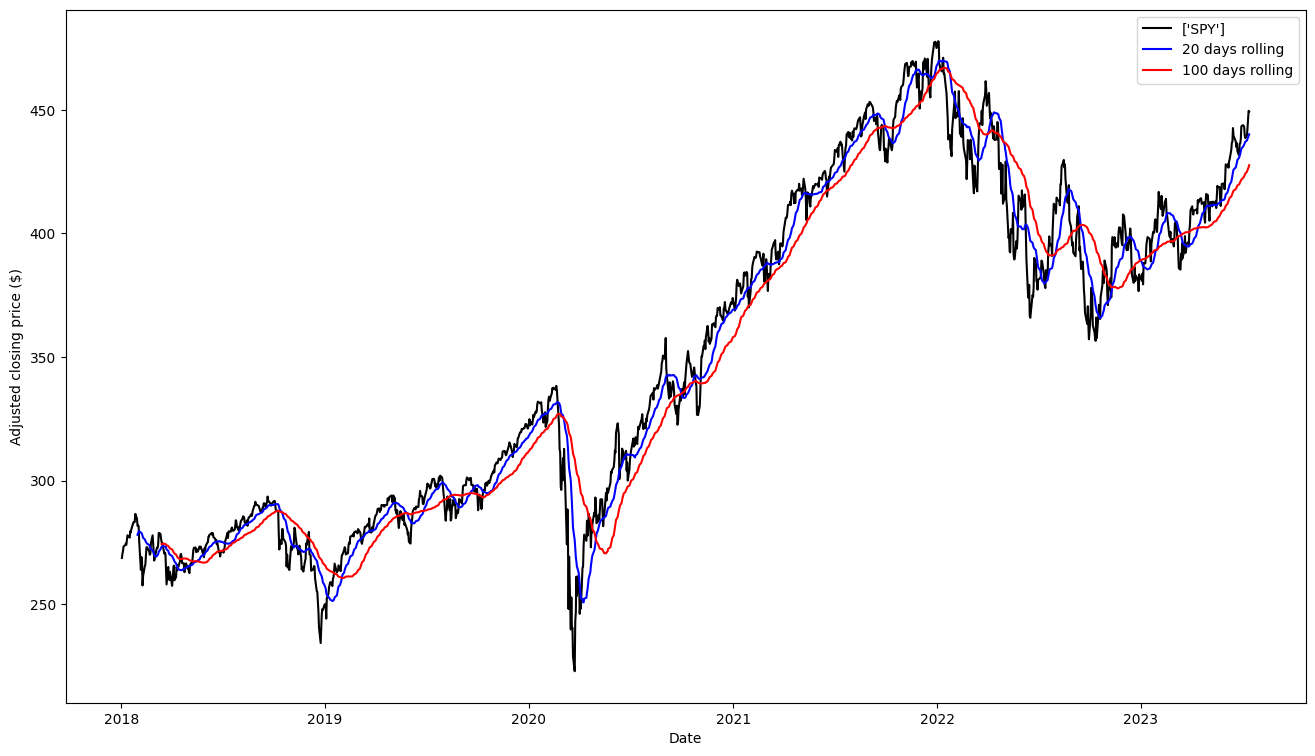

In [21]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling = close.rolling(window=20).mean()
long_rolling = close.rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker, color = 'k')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling',color = 'b')
ax.plot(long_rolling.index, long_rolling, label='100 days rolling',color = 'r')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()


In [22]:
#defining a strategy for exit when long MA falls below slow MA and return profits

def MA_strategy1(close, fast_val, slow_val, sma = True):

  if sma:
    short_rolling = close.rolling(window=fast_val).mean()
    long_rolling = close.rolling(window=slow_val).mean()
  else:
    short_rolling = close.ewm(span=fast_val, adjust=False).mean()
    long_rolling = close.ewm(span=slow_val, adjust=False).mean()

  time_counter = 250
  profit = 0
  FF_loop_flag = True
  while FF_loop_flag:

    #FF to first up cross and save the entry price

    while FF_loop_flag and short_rolling[time_counter] <= long_rolling[time_counter]:
      time_counter += 1
      if time_counter >= len(short_rolling):
        FF_loop_flag = False
        time_counter -= 1
    entry_price = close[time_counter]

    #FF to first close below slow MA and save the entry price

    while FF_loop_flag and short_rolling[time_counter] >= long_rolling[time_counter]:
      time_counter += 1
      if time_counter >= len(short_rolling):
        FF_loop_flag = False
        time_counter -= 1
    exit_price = close[time_counter]
    profit = profit + (exit_price - entry_price)

  return profit


[3, 7]
[3, 9]
[3, 10]
[3, 12]
[3, 13]
[3, 15]
[4, 10]
[4, 12]
[4, 14]
[4, 16]
[4, 18]
[4, 20]
[5, 12]
[5, 15]
[5, 17]
[5, 20]
[5, 22]
[5, 25]
[6, 15]
[6, 18]
[6, 21]
[6, 24]
[6, 27]
[6, 30]
[7, 17]
[7, 21]
[7, 24]
[7, 28]
[7, 31]
[7, 35]
[8, 20]
[8, 24]
[8, 28]
[8, 32]
[8, 36]
[8, 40]
[9, 22]
[9, 27]
[9, 31]
[9, 36]
[9, 40]
[9, 45]
[10, 25]
[10, 30]
[10, 35]
[10, 40]
[10, 45]
[10, 50]
[11, 27]
[11, 33]
[11, 38]
[11, 44]
[11, 49]
[11, 55]
[12, 30]
[12, 36]
[12, 42]
[12, 48]
[12, 54]
[12, 60]
[13, 32]
[13, 39]
[13, 45]
[13, 52]
[13, 58]
[13, 65]
[14, 35]
[14, 42]
[14, 49]
[14, 56]
[14, 63]
[14, 70]
[15, 37]
[15, 45]
[15, 52]
[15, 60]
[15, 67]
[15, 75]
[16, 40]
[16, 48]
[16, 56]
[16, 64]
[16, 72]
[16, 80]
[17, 42]
[17, 51]
[17, 59]
[17, 68]
[17, 76]
[17, 85]
[18, 45]
[18, 54]
[18, 63]
[18, 72]
[18, 81]
[18, 90]
[19, 47]
[19, 57]
[19, 66]
[19, 76]
[19, 85]
[19, 95]
[20, 50]
[20, 60]
[20, 70]
[20, 80]
[20, 90]
[20, 100]
[21, 52]
[21, 63]
[21, 73]
[21, 84]
[21, 94]
[21, 105]
[22, 55]
[22, 66

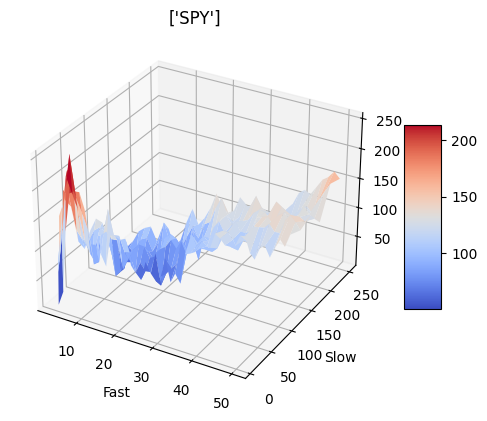

In [23]:
#set up slowperiod and fastperiod values

#set up fast MA maximum and minimum values
fastminval = 3
fastmaxval = 50

#range(x,y) will return floats from x to y-1 and list() will put them into a list
fastvec = list(range(fastminval, fastmaxval+1))

#set up slow MA values by creating multiples for the fast MA
slowmult = [2.5,3,3.5,4,4.5,5]
slowlist = []
fastlist = []

#setting up final lists of fast and slow MA by multiplying
#tmp_slow and tmp_fast are lists of five numbers that are within larger lists of slowlist and fastlist
#tmp_fast is a list of five identical values while tmp_slow is a list of five values of tmp_fast multiplied by slowmult
for fastPeriod in fastvec:
  tmp_slow = []
  tmp_fast = []
  for multval in slowmult:
    tmp_slow.append(int(multval*fastPeriod))
    tmp_fast.append(fastPeriod)
  slowlist.append(tmp_slow)
  fastlist.append(tmp_fast)

#backtest each fastperiod/slowperiod pair
net_profit_list = []

#range(len(fastvec)) --> len(fastvec) returns how many items in the fastvec list and range() returns floats from 0 to len(fastvec) - 1
#this is to choose that index as fastPeriod from fastvec and slowPeriod from slowlist
#then use function defined earlier to find profits and append to list
for i in range(len(fastvec)):
  fastPeriod = fastvec[i]
  tmp_profit_list = []
  for slowPeriod in slowlist[i]:

    print([fastPeriod,slowPeriod])
    tmp_profit_list.append(MA_strategy1(close, fastPeriod, slowPeriod, sma=True))

  net_profit_list.append(tmp_profit_list)

#Surface plot of profitability ...

#creating a array (matrix) of len(fastvec) by len(slowmult) of zeroes where fast_length is the number of columns and slow_length is the number of rows
#setting up value by value in the matrix from fastlist and slowlist by choosing values from the tmp_slow and tmp_fast lists within
fast_length=len(fastvec)
slow_length=len(slowmult)
X = np.zeros((fast_length,slow_length))
Y = np.zeros((fast_length,slow_length))
Z = np.zeros((fast_length,slow_length))
for i in range(fast_length):
  for j in range(slow_length):
    X[i,j] = fastlist[i][j]
    Y[i,j] = slowlist[i][j]
    Z[i,j] = net_profit_list[i][j]

#unravel_index (converts a flat index or array of flat indices into a tuple of coordinate arrays)
#used to get the index for maxptr --> first argument is an array or indices and second argument is shape
#argmax (returns the indices of the maximum values along an axis) in the form of a flat array
maxptr = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
print('Fast MA with max profit = ', int(X[maxptr]))
print('Slow MA with max profit = ', int(Y[maxptr]))
print('Max profit = ', Z[maxptr])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(ticker)
ax.set_xlabel('Fast')
ax.set_ylabel('Slow')
ax.set_zlabel('Profit $')
plt.show()

